## Project 3: Web APIs & NLP
### Author: Brian Jankowitz
[Medium](https://medium.com/@JankowitzB) | [LinkedIn](https://www.linkedin.com/in/brian-jankowitz/)

## Problem Statement

With the mandatory retirmemnt age of airline pilots being 65 years old, a lot of airline pilots are reaching the mandatory retirment age. According to CNBC, there will be a demand for 800,000 new airline pilots over the next 20 years. Ex-CEO of Boeing, Dennis Muilenburg, says that "the global pilot shortage will be one of the biggest challenges facing the airline industry.

Airlines have tried to help train new pilots by creating Cadet Programs. The marketing team in our company wants to market cadet programs to people interetsed in aviation. To predict accurately which group they should market to, the marketing team wants to see from certain posts which category a user might belong to, Technology or Flying, and market to them. These two groups were chosen as they both have potential interests at becoming pilots. Different ads will be used to market to them in order to expose them to the cadet program. The ultimate goal of having them sign up for cadet programs to reduce help employ pilots at an airline. 

## Executive Summary

 I decided to collect data from two subreddits, Technology and Flying. After I gathered the data and saved it to a dataframe, I analyzed the shape and the type of data that was in there. There were nulls in the data but that did not affect me cleaning the data as they were not in the two columns we were looking at.

I made a function that cleaned the data. The function makes all the characters lowercase, removes punctuation, whitespace, and html special entities, and lemmatized all the words. I then made a function to get the common words. This function prints the top 20 most common words. This was used to see which words were common. I decided to remove the common English stop words, flying, and technology as I wanted to make accurate predictions without having the name of the subreddit category in the data.

I made two models, each being tested with two vectorizers for train test split. I used Logistic Regression and MultinomialNB for my models and Count Vectorizer and TfidfVectorizer for my vectorizers. When the best model which had MultinomialNB and Count Vectorizer, I looked at the best ngram range and the max features. The best ngram range was (1,2) and max features was 1280.  I tested max features, stop words, and ngram range. The goal was to have the least number of true negatives with a high true positive. This model had the lowest false negatives with 44 and true positive at 409. The train score was 93 and .89. There is a little overfit but this model had the least true negatives which is good for the marketing team as they won’t market to people that are not their target audience.

## Table of Contents

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Project-3:-Web-APIs-&amp;-NLP" data-toc-modified-id="Project-3:-Web-APIs-&amp;-NLP-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Project 3: Web APIs &amp; NLP</a></span></li><li><span><a href="#By:-Brian-Jankowitz" data-toc-modified-id="By:-Brian-Jankowitz-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>By: Brian Jankowitz</a></span></li></ul></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Loading-Libraries-&amp;-Data" data-toc-modified-id="Loading-Libraries-&amp;-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loading Libraries &amp; Data</a></span></li><li><span><a href="#Preliminary-EDA-(optional)" data-toc-modified-id="Preliminary-EDA-(optional)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preliminary EDA (optional)</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#MultinomialNB" data-toc-modified-id="MultinomialNB-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>MultinomialNB</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#References" data-toc-modified-id="References-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Loading Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import requests
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import regex as re
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
# Importing dataframe
#S ubreddit1 is technology
# subreddit 2 is flying
# combined is both
subreddit1 = pd.read_csv('datasets/subreddit1.csv'); 
subreddit2 = pd.read_csv('datasets/subreddit2.csv');
combined = pd.read_csv('datasets/combined.csv', );

## Preliminary EDA (optional)

We want to see how big the data is that we scrapped from Reddit. Subreddit 1 is a lot smaller than Subreddit 2 which could be a concern to us. Since we are just going to be working at keywords that are common in each thread, it should be concern for us as our model will perform fine with the data we have.

In [3]:
# Show size of all dataframes
print('Subreddit 1 shape: ') 
print(subreddit1.shape)
print('Subreddit 2 shape: ') 
print(subreddit2.shape)
print('Combined shape: ') 
print(combined.shape)

Subreddit 1 shape: 
(509, 10)
Subreddit 2 shape: 
(1709, 10)
Combined shape: 
(2218, 10)


Subreddit 1 and subreddit 2 are assign to another value so we can go back and look at that data at another time in the future.

In [4]:
# Assigning to another value
# Looking at data in first subreddit
subreddit1_original = subreddit1
subreddit1.head()

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,2,Tech Trends in 2020,[removed],technology,1577819103,EPTechCG,2,1,True,2019-12-31
1,5,Universal Split Screen KB&amp;M + 1 Controller,[removed],technology,1577821148,AE_Rulez,1,1,True,2019-12-31
2,9,Voip.ms,[removed],technology,1577822621,don_s-Canadian,2,1,True,2019-12-31
3,18,Magento E-commerce Development Company,[removed],technology,1577825383,brookeB111,2,1,True,2019-12-31
4,28,Dell Inspiron i3-7878 - passes all diagnostics...,[removed],technology,1577827820,ZheeDog,1,1,True,2019-12-31


In [5]:
# Assigning to another value
# Looking at data in second subreddit
subreddit2_original = subreddit2
subreddit2.head()

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,0,Does having depression disqualify me from gett...,I just read a post on here relating to mental ...,flying,1577819291,Wajarbe,15,1,True,2019-12-31
1,3,Where's the most beautiful/your favorite place...,"Sup /r/Flying! As the title says, I'm curious ...",flying,1577824501,The_Desert_Pilot,73,1,True,2019-12-31
2,4,What happens if you get tired mid-flight ?,"Starting pilot school, something I’ve always w...",flying,1577825030,virago91,42,1,True,2019-12-31
3,5,Class 1 medical,"Hey guys! First of all, I wish you all happy n...",flying,1577826691,PouletRiz,2,1,True,2019-12-31
4,6,Alcohol history and medicals,"This may seem completely counterproductive, I ...",flying,1577829232,sgf-guy,12,1,True,2019-12-31


We combine subreddit 1 and 2 so we can have a dataframe with everything included. This will be used for our model.

In [6]:
# Looking at data in first subreddit
# Assigned to another variable so we can go back to look at
combined_original = combined
combined.head()

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,2,Tech Trends in 2020,[removed],technology,1577819103,EPTechCG,2,1,True,2019-12-31
1,5,Universal Split Screen KB&amp;M + 1 Controller,[removed],technology,1577821148,AE_Rulez,1,1,True,2019-12-31
2,9,Voip.ms,[removed],technology,1577822621,don_s-Canadian,2,1,True,2019-12-31
3,18,Magento E-commerce Development Company,[removed],technology,1577825383,brookeB111,2,1,True,2019-12-31
4,28,Dell Inspiron i3-7878 - passes all diagnostics...,[removed],technology,1577827820,ZheeDog,1,1,True,2019-12-31


## Data Cleaning

There are nulls in selftext. It does not matter to us because we are just looking at the title and subreddit.

In [7]:
combined.isnull().sum()

Unnamed: 0       0
title            0
selftext        63
subreddit        0
created_utc      0
author           0
num_comments     0
score            0
is_self          0
timestamp        0
dtype: int64

In [8]:
# To see data type
# Subreddit will need to be assigned to numbers for train test split
combined.dtypes

Unnamed: 0       int64
title           object
selftext        object
subreddit       object
created_utc      int64
author          object
num_comments     int64
score            int64
is_self           bool
timestamp       object
dtype: object

There are no nulls in our data for the valus that matter to us. For selftext, there are some rows with [removed]. This is not a concern to us as we will compare title and subreddit. This Selftext will not be cleaned.

In [9]:
# This function is to clean the data. It will make all the text
# lowercase, remove HTMLs, remove whitespace (new line characters)
# Lemmatize is making each word the root word in the dictionary.
wnl = WordNetLemmatizer()
def clean_text(text): 
    #print(text)
    # To lowercase
    text = text.lower() 
    # Remove HTML special entities (e.g. &amp;)    
    text = re.sub(r'\&\w*;', '', text)     
    text = re.sub(r'\s\s+', ' ', text) # Remove whitespace (including new line characters)        
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    words = text.split()
        #print(words)

    words_2 = []

    for word in words: 
        word_2 = wnl.lemmatize(word)
            #if word != word_2:
                #print(word,word_2)
        words_2.append(word_2)      

    output = ' '.join(words_2)
        #print(output)
    return output

In [10]:
# Use the clean_text function to clean the data
combined['title'] = combined['title'].apply(clean_text)

## Exploratory Data Analysis (EDA)

In [11]:
# https://github.com/amreshsharma/Machine-Learning/blob/master/NLP/Twitter%20Sentiment%20Analysis/sentiment_twitter_analysis.py

# print top words in df and most common words
def common_words(df, column, name):

    cvec = CountVectorizer(stop_words='english')
    cvec.fit(df[column])

    len_features = len(cvec.get_feature_names())
    #print('Total Word Count: ' + str(len_features))

    df_cvec = pd.DataFrame(cvec.transform(df[column]).todense(),columns=cvec.get_feature_names())

    common_column = df_cvec.sum(axis=0)
    print(str(common_column.sort_values(ascending = False).head(20)))
    name = common_column.sort_values(ascending = False)
    return name
    #return common_column 


Flying and technology will be added to the stop word list as they are words that are the names
of the categories. This could help our model but it could also help the mode by "cheating". The words were removed to give more true results.

In [12]:
# Show top 20 words for subreddit 1
com_words_1=common_words(subreddit1, 'title', 'common_words_subreddit1');

market         42
help           37
technology     28
best           25
need           19
tech           18
app            15
facebook       15
new            14
development    14
phone          13
amp            13
company        11
microsoft      11
use            11
question       11
2020           11
2019           10
apple          10
10             10
dtype: int64


In [13]:
com_words_2=common_words(subreddit2, 'title', 'common_words_subreddit2');

pilot         161
flight        160
flying        102
question       84
ppl            83
school         69
checkride      68
pilots         67
cfi            65
aviation       62
time           55
commercial     53
medical        53
advice         51
help           49
looking        45
training       42
need           41
plane          41
fly            40
dtype: int64


In [14]:
com_words=common_words(subreddit1, 'title', 'combined');

market         42
help           37
technology     28
best           25
need           19
tech           18
app            15
facebook       15
new            14
development    14
phone          13
amp            13
company        11
microsoft      11
use            11
question       11
2020           11
2019           10
apple          10
10             10
dtype: int64


We can see the most common words below for each subreddit. For subreddit 1, we can see specific words for technology such as app and development. For subreddit 2, we can see that there are word specific for flying such as pilot and aviation. Technolog and flying will need to be removed to avoid leakage into our model.

Text(0, 0.5, 'Word Count')

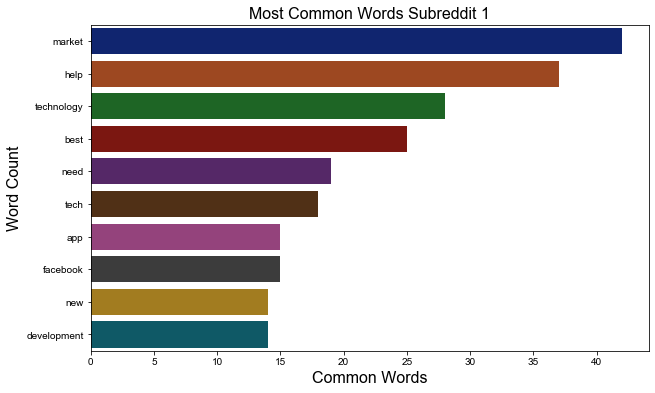

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(y=com_words_1.index[:10], x=com_words[:10], palette = ('dark'), orient='h')
sns.set(style='darkgrid')
plt.title('Most Common Words Subreddit 1', fontsize=16)
plt.xlabel(xlabel='Common Words', fontsize=16)
plt.ylabel(ylabel='Word Count', fontsize=16)

Text(0, 0.5, 'Word Count')

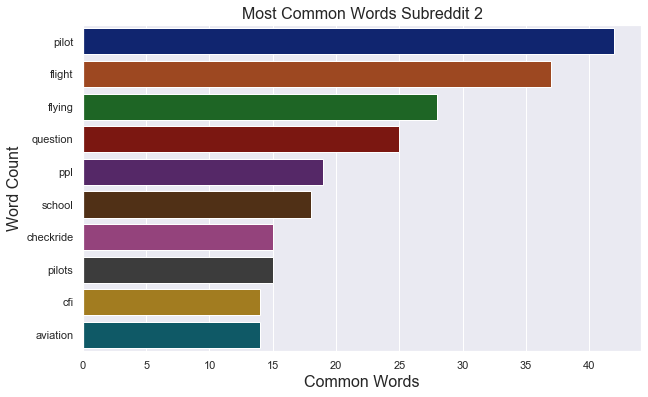

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(y=com_words_2.index[:10], x=com_words[:10], palette = ('dark'), orient='h')
sns.set(style='darkgrid')
plt.title('Most Common Words Subreddit 2', fontsize=16)
plt.xlabel(xlabel='Common Words', fontsize=16)
plt.ylabel(ylabel='Word Count', fontsize=16)

Text(0, 0.5, 'Word Count')

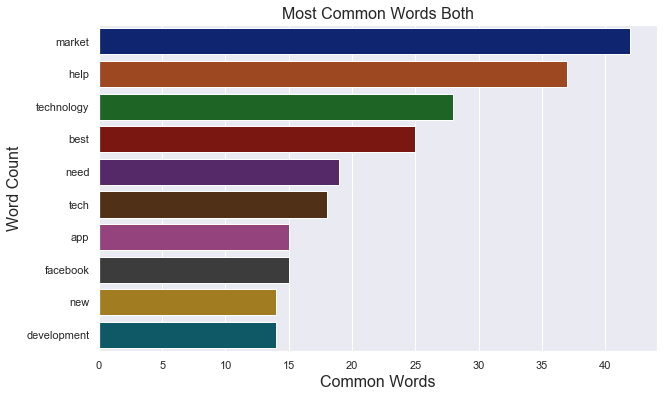

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(y=com_words.index[:10], x=com_words[:10], palette = ('dark'), orient='h')
sns.set(style='darkgrid')
plt.title('Most Common Words Both', fontsize=16)
plt.xlabel(xlabel='Common Words', fontsize=16)
plt.ylabel(ylabel='Word Count', fontsize=16)

In [19]:
# Add stop words to the stop words with English
stopwords1 = nltk.corpus.stopwords.words('english').append(['flying', 'technology'])

Flying and technology were added to stop words so the names of the category of the subreddit is not in the data. This will help us refine our model better as it does prevent the model from cheating.

In [20]:
# Mapping the subreddit column with integers
subreddit = {'technology': 0, 'flying': 1 }
combined['subreddit'] = combined['subreddit'].map(subreddit)

## Model Preparation

The first test with max features, it says the best features is at 500 

Test 1: Train = 0.8885, Test = 0.8521 (100, 200) features
Test 2: Train = 0.9236, Test = 0.8688 (100, 500) features
Test 3: Train = 0.9735, Test = 0.8724 (100, 1000) features
Test 4: Train = 0.9648, Test = 0.8706 (100, 3787) features

In [21]:
# Assigning X and y to be used for train test
X = combined['title']
y =combined['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y) 


In [59]:
y_test.value_counts(normalize=True)
#pd.Series(gs_model_cvec.predict(X_test)).value_counts()

1    0.771171
0    0.228829
Name: subreddit, dtype: float64

## Modeling

We made two models, each being tested with two vectorizers for train test split. I used Logistic Regression and MultinomialNB for my models and Count Vectorizer and TfidfVectorizer for my vectorizers.

### Baseline Model

In [60]:
#Baseline model
print('Train baseline accuracy: ' + str(y_train.value_counts(normalize=True).max()))
print('Test baseline accuracy: ' + str(y_test.value_counts(normalize=True).max()))

Train baseline accuracy: 0.7702946482260974
Test baseline accuracy: 0.7711711711711712


### Logistic Regression

Logistic Regression and Count Vectorizer is our best model as our test score is good. Our sensitivity score is good at 98.1% which means we are predicting our true positives well. This model always has the most true positivtes and false positives combined which is good for the marketing team as this will minimize marketing to the wrong people.

In [61]:
#1200- 95, 89 600- .92, .89
pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver='liblinear'))
])
pipe_cvec.fit(X_train, y_train)
pipe_params = {
    'cvec__max_features': np.arange(500,650,20), # Comment changes # Should be tested in ranges
    'cvec__stop_words':[None, stopwords1],
    'cvec__ngram_range': [(1,1), (1,2)]} # binary predction, tp rate, f1 score, metric to maximize 
gs_cvec = GridSearchCV(pipe_cvec, #binomial, gaussian, support vector, decision tree
            pipe_params, cv=5) # Search metric/change
gs_cvec.fit(X_train, y_train);

gs_model_cvec = gs_cvec.best_estimator_
#print('Estimator:' + str(gs_model_cvec)) # Commented out, shows best max_features
print('Train score:' + str(gs_model_cvec.score(X_train, y_train))) 
print('Test score:' + str(gs_model_cvec.score(X_test, y_test)))

Train score:0.9410703547805171
Test score:0.8612612612612612


In [62]:
# Splitting data and giving us results for a score
# 3 was choosen as our data is not that big.
cross_val_score(gs_model_cvec, X, y, cv=3)

array([0.87297297, 0.86197564, 0.86062246])

In [63]:
y_pred = gs_model_cvec.predict(X_test) #For matrix below, repetivie from previous cell but to keep consistency
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positives: %s" % tp)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Negatives: %s" % tn)

# confusion matrix metrics

#accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
#specificity = tn/(tn+fp)
#precision = tp/(tp+fp)

#print('Accuracy:',round(accuracy,4))
print('Sensitivity:',round(sensitivity,4))
#print('Specificity:',round(specificity,4))
#print('Precision:',round(precision,4))

True Positives: 424
False Positives: 73
False Negatives: 4
True Negatives: 54
Sensitivity: 0.9907


In [64]:
# 600 .9, .88 
pipe_tf = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegression(solver='liblinear'))
])
pipe_tf.fit(X_train, y_train)
pipe_params = {
    'tf__max_features': np.arange(500,650,20), # Comment changes # Should be tested in ranges
    'tf__stop_words':[None, stopwords1],
    'tf__ngram_range': [(1,1), (1,2)]} # binary predction, tp rate, f1 score, metric to maximize 
gs_tf = GridSearchCV(pipe_tf, #binomial, gaussian, support vector, decision tree
            pipe_params, cv=5) # Search metric/change
gs_tf.fit(X_train, y_train);

gs_model_tf = gs_tf.best_estimator_
#print('Estimator:' + str(gs_model_tf)) # Shows best estimator 
print('Train score:' + str(gs_model_tf.score(X_train, y_train))) # baseline score- proportion
print('Test score:' + str(gs_model_tf.score(X_test, y_test)))# Need to put accuracy

Train score:0.8875526157546603
Test score:0.8378378378378378


In [65]:
cross_val_score(gs_model_tf, X, y, cv=3).mean()

0.8376921576515622

In [66]:
y_pred = gs_model_tf.predict(X_test)
# create confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positives: %s" % tp)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Negatives: %s" % tn)

# confusion matrix metrics

#accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
#specificity = tn/(tn+fp)
#precision = tp/(tp+fp)

#print('Accuracy:',round(accuracy,4))
print('Sensitivity:',round(sensitivity,4))
#print('Specificity:',round(specificity,4))
#print('Precision:',round(precision,4))

True Positives: 427
False Positives: 89
False Negatives: 1
True Negatives: 38
Sensitivity: 0.9977


### MultinomialNB


In [67]:
mnb_tf = Pipeline(steps=[
    ('tf', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])


pipe_tf.fit(X_train, y_train)
pipe_params = {
    'tf__max_features': np.arange(400,600, 20), # Comment changes
    'tf__stop_words':[None, stopwords1],
    'tf__ngram_range': [(1,2),(1,1)], 
    'mnb__alpha': [1]}
gs_tf = GridSearchCV(mnb_tf,
            param_grid=
            pipe_params, cv=5)

gs_tf.fit(X_train, y_train);

gs_model_tf = gs_tf.best_estimator_
#print('Estimator:' + str(gs_model_tf)) # Shows best estimator 
print('Train score:' + str(gs_model_tf.score(X_train, y_train)))
print('Test score:' + str(gs_model_tf.score(X_test, y_test)))

Train score:0.8977751052315093
Test score:0.8522522522522522


In [68]:
cross_val_score(gs_model_tf, X, y, cv=3).mean()

0.8476106011288692

In [69]:
#confusion_matrix(y_test, y_pred)
y_pred = gs_model_tf.predict(X_test)
# create confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positives: %s" % tp)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Negatives: %s" % tn)

# confusion matrix metrics

#accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
#specificity = tn/(tn+fp)
#precision = tp/(tp+fp)

#print('Accuracy:',round(accuracy,4))
print('Sensitivity:',round(sensitivity,4))
#print('Specificity:',round(specificity,4))
#print('Precision:',round(precision,4))

True Positives: 426
False Positives: 80
False Negatives: 2
True Negatives: 47
Sensitivity: 0.9953


In [70]:
# 900 .93 .90 1500 .95, .90
mnb_cvec = Pipeline(steps=[
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_params = {
    'cvec__max_features': np.arange(1200,1450, 20), # Comment changes
    'cvec__stop_words':[None, stopwords1],
    'cvec__ngram_range': [(1,2),(1,1)], 
    'mnb__alpha': [1]}
gs_cvec = GridSearchCV(mnb_cvec,
            param_grid=
            pipe_params, cv=5)

gs_cvec.fit(X_train, y_train);

gs_model_cvec = gs_cvec.best_estimator_
#print('Estimator:' + str(gs_model_cvec)) # Shows best estimator 
print('Train score:' + str(gs_model_cvec.score(X_train, y_train)))
print('Test score:' + str(gs_model_cvec.score(X_test, y_test)))

y_test_lr_cvec = y_test
y_pred = gs_model_cvec.predict(X_test) # For matrix below
y_pred_lr_cvec = y_pred # For matrix below

Train score:0.9488875526157546
Test score:0.8792792792792793


In [71]:
cross_val_score(gs_model_cvec, X, y, cv=3).mean()

0.8823288105426129

In [72]:
#confusion_matrix(y_test, y_pred)
y_pred = gs_model_cvec.predict(X_test)
# create confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positives: %s" % tp)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Negatives: %s" % tn)

# confusion matrix metrics

#accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
#precision = tp/(tp+fp)

#print('Accuracy:',round(accuracy,4))
print('Sensitivity:',round(sensitivity,4))
#print('Specificity:',round(specificity,4))
#print('Precision:',round(precision,4))

True Positives: 415
False Positives: 54
False Negatives: 13
True Negatives: 73
Sensitivity: 0.9696


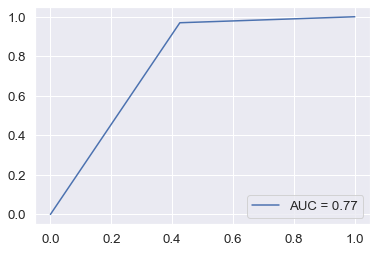

In [73]:
probs = gs_cvec.predict(X_test)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

The ROC graph above shows us how well our classifier shows between classes. This graph could be imporved and the linecan be pushed more towards the top left corner for better predictions between classes. An excellent graph has a AUC (area under the curve of 1). This graph is 0.79.

## Model Selection

The train and test score are overfit as there is a .04 difference.
The count val score shows us that it is very close to the test score. 
The best model is Logistic Regressresion with count Vectorizer. The way that I made the train score increase and decrease false positives was by looking at the max features and adjusting it. We adjusted it accordingly with the best estimator. count validation was looked at to make sure our model was doing well
We have a true positive of 415 which we want to maximize and false negative of 37 which we want to minimize. Our sensitivity score is 97.43% which means we can predict 97.43% of people who are from each subreddit correcly. It is important to have a higher true positive than false negative but it is more important to have less false positive as we don't want to waste money marketing to people who are not in the correct category This is good as it predicts the most number of true positives and the least number of false negative. This would let the marketing team market to the incorrect people which could waste their money as they would be marketing to the wrong group.

## Model Evaluation 

In [74]:
def pretty_confusion_matrix(y_true, y_pred):
    
    cm = confusion_matrix(y_true, y_pred)
    labels = y_true.unique()
    labels.sort()
    linewidth=.23
    
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,8))
    
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix for Logistic Regression and CountVectorizer")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 

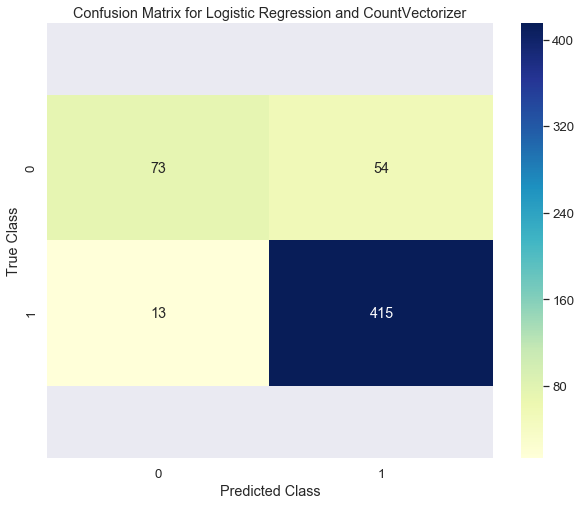

In [75]:
pretty_confusion_matrix(y_test_lr_cvec, y_pred_lr_cvec)

## Conclusion
We are able to predict which subreddit a person comes from 89% correctly, we can confidently say that we can differentiate between the two subreddits, flying and technology. We have a sensitivity of 97% which means we are prediciting our true positives, the subreddit that the person comes from, correctly 97%. This is good as we want to maximize the number of people that the marketing team can use to market to the their audience from each subreddit. This can help increase awareness about the cadet program with the ultimate goal of having people sign up for the cadet program. This will be able to help decrease the shortage of airline pilots in the future.

## Recommendations
I would recomend taking this model and starting with a small group to market to. If there is a higher response rate, I would increase the market spending.

## References

-  https://bearylogical.net/post/ml-subreddit/#pipeline-for-logistic-regression-baseline
-  https://github.com/amreshsharma/Machine-Learning/blob/master/NLP/Twitter%20Sentiment%20Analysis/sentiment_twitter_analysis.py